In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib

import pandas as pd
import os
from tqdm import tqdm

color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b

n_iter = 4000
time_step_calc = 0.2
step_time_out = 2

time = np.linspace(start=0, stop= (int)((time_step_calc*n_iter)-step_time_out), num= (int) ((time_step_calc*n_iter)/step_time_out))
index_cut = (int)((time_step_calc*n_iter)/step_time_out)

In [3]:
#the function below finds the 50% drift time of a waveform
def drift_time_50(chargeVals):
    
    #find amplitude at t=400
    amp=chargeVals[time==790]*0.5
    
    #find time when amplitude is 50% of one at 400s
    
    #need to use a range since there might not be a specific time for amplitude*0.5
    toReturn=time[(chargeVals<=(amp+(amp*0.05)))&(chargeVals>=(amp-(amp*0.05)))]
    if isinstance(toReturn,(int,float)):
        #print('Float case caught')
        return toReturn
    if isinstance(toReturn, np.ndarray) and (toReturn.size != 0):
        #print('List case caught')
        #print(toReturn)
        return toReturn[0]
    print("No drift time found. Please increase the bounds")
    return 0

In [4]:
#This function goes through the input directory, loads all the files with text files. Then it look goes through
#z values between and including 0 and 34 and loads the files with that radius. It then creates a nxm matrix such that
#n is the radius m is the charge collected with time.
#IF USING FOR DETECTOR WITH RADIUS GREATER THAN 35, MAKE SURE TO CHANGE THE RANGE INSIDE THE FUCNTION
def getData(directory_input):
    charge_data = np.zeros((15,len(time)))
    directory = directory_input
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".txt"): 
            print(filename)
            z = 0.000
            for i in range(0,15):
                #print(z[i])
                z_val = "z={z_temp}"
                look_z = z_val.format(z_temp=round(z,2))
                #print(look_z)
                if(look_z in filename):
                    print('looking for', look_z)
                    #rad_data = np.loadtxt(directory+'/'+'signal_'+lookRad+'_phi=0.0_z=0.1.txt')[0:index_cut]
                    #for i in range(0,len(rad_data)):
                        #charge_data[r][i]=rad_data[i]
                z = z + 0.020
            continue
    return charge_data

In [6]:
zero_q_r15_z0p01= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.01.txt")

zero_q_r15_z0p02= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.02.txt")
zero_q_r15_z0p06= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.06.txt")
zero_q_r15_z0p10= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.10.txt")
zero_q_r15_z0p14= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.14.txt")
zero_q_r15_z0p18= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.18.txt")
zero_q_r15_z0p20= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.20.txt")
zero_q_r15_z1p00= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=1.00.txt")
zero_q_r15_z2p00= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=2.00.txt")
zero_q_r15_z3p00= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=3.00.txt")
zero_q_r15_z4p00= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=4.00.txt")
zero_q_r15_z5p00= np.loadtxt("/home/kevinhbhimani/Desktop/Siggen_simulations/siggen_cori/Analysis/waveforms/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=5.00.txt")


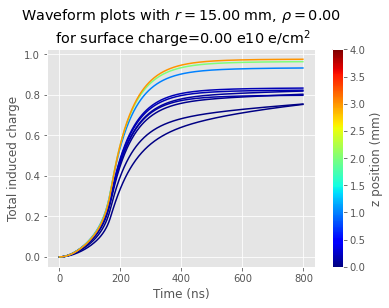

In [9]:
cmap= plt.get_cmap('jet')

parameters = np.linspace(0,4,200)
norm = matplotlib.colors.Normalize(vmin=np.min(parameters),vmax=np.max(parameters))
c_m = plt.cm.jet
s_m = plt.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

plt.plot(time,zero_q_r15_z0p01,'-',markersize=2,color=s_m.to_rgba(0.02))

plt.plot(time,zero_q_r15_z0p02,'-',markersize=2,color=s_m.to_rgba(0.02))
plt.plot(time,zero_q_r15_z0p06,'-',markersize=2,color=s_m.to_rgba(0.06))
plt.plot(time,zero_q_r15_z0p10,'-',markersize=2,color=s_m.to_rgba(0.10))
plt.plot(time,zero_q_r15_z0p14,'-',markersize=2,color=s_m.to_rgba(0.14))
plt.plot(time,zero_q_r15_z0p18,'-',markersize=2,color=s_m.to_rgba(0.18))
plt.plot(time,zero_q_r15_z0p20,'-',markersize=2,color=s_m.to_rgba(0.20))
plt.plot(time,zero_q_r15_z1p00,'-',markersize=2,color=s_m.to_rgba(1.00))
plt.plot(time,zero_q_r15_z2p00,'-',markersize=2,color=s_m.to_rgba(2.00))
plt.plot(time,zero_q_r15_z3p00,'-',markersize=2,color=s_m.to_rgba(3.00))
#plt.plot(time,zero_q_r15_z4p00,'-',markersize=2,color=s_m.to_rgba(9))
#plt.plot(time,zero_q_r15_z5p00,'-',markersize=2,color=s_m.to_rgba(10))

plt.ylabel('Total induced charge')
plt.xlabel('Time (ns)')
plt.title('Waveform plots with $r=15.00$ mm, $\\rho=0.00$ \n for surface charge=0.00 e10 e/cm$^2$')
#plt.legend(labels=lab_array, prop={'size': 6})
cb = plt.colorbar(s_m)
cb.set_label('z position (mm)')
plt.show()


Text(0.5, 1.0, 'Energy collected for events with $r=15.00$ mm, $\\rho=0.00$ \n for surface charge=0.00 e10 e/cm$^2$')

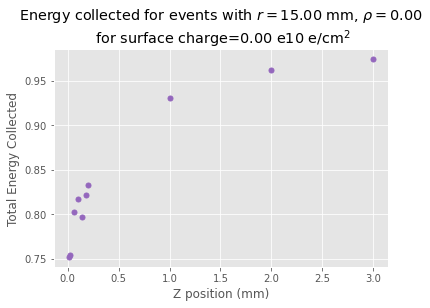

In [10]:
zpos= [0.01,0.02,0.06,0.10,0.14,0.18,0.20,1.00,2.00,3.00]
energy= [np.max(zero_q_r15_z0p01),np.max(zero_q_r15_z0p02),np.max(zero_q_r15_z0p06),np.max(zero_q_r15_z0p10),np.max(zero_q_r15_z0p14),np.max(zero_q_r15_z0p18),
        np.max(zero_q_r15_z0p20),np.max(zero_q_r15_z1p00),np.max(zero_q_r15_z2p00),np.max(zero_q_r15_z3p00)]
plt.plot(zpos,energy,'o',markersize=5,color='tab:purple')

plt.ylabel('Total Energy Collected')
plt.xlabel('Z position (mm)')
plt.title('Energy collected for events with $r=15.00$ mm, $\\rho=0.00$ \n for surface charge=0.00 e10 e/cm$^2$')

Text(0.5, 1.0, '50% drift time for events with $r=15.00$ mm, $\\rho=0.00$ \n for surface charge=-0.50 e10 e/cm$^2$')

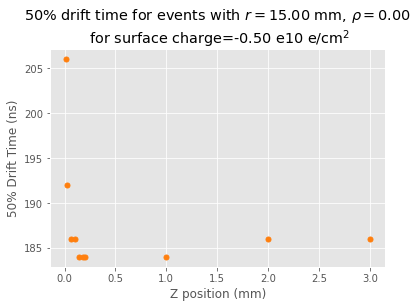

In [11]:
drift_times= [drift_time_50(zero_q_r15_z0p01),drift_time_50(zero_q_r15_z0p02),drift_time_50(zero_q_r15_z0p06),drift_time_50(zero_q_r15_z0p10),drift_time_50(zero_q_r15_z0p14),drift_time_50(zero_q_r15_z0p18),
        drift_time_50(zero_q_r15_z0p20),drift_time_50(zero_q_r15_z1p00),drift_time_50(zero_q_r15_z2p00),drift_time_50(zero_q_r15_z3p00)]
plt.plot(zpos,drift_times,'o',markersize=5,color='tab:orange')

plt.ylabel('50% Drift Time (ns)')
plt.xlabel('Z position (mm)')
plt.title('50% drift time for events with $r=15.00$ mm, $\\rho=0.00$ \n for surface charge=-0.50 e10 e/cm$^2$')

Text(0.5, 1.0, 'Waveform plots with $r=15.00$ mm, z= 0.01, $\\rho=0.00$ \n for surface charge=0.00 e10 e/cm$^2$')

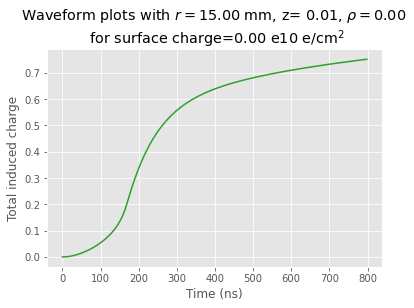

In [14]:
plt.plot(time,zero_q_r15_z0p01,'-',markersize=2,color='tab:green')

plt.ylabel('Total induced charge')
plt.xlabel('Time (ns)')
plt.title('Waveform plots with $r=15.00$ mm, z= 0.01, $\\rho=0.00$ \n for surface charge=0.00 e10 e/cm$^2$')